# TITLE: Mental Health Monitoring via Social Media using Logistic Regression

## Step - 1: Setting the Research Goal 

In [3]:
"""The primary objective of this research is to develop a data-driven system capable of identifying early 
warning signs of mental health issues such as depression, anxiety, and stress through the analysis of social 
media content. By leveraging user\’s online behavior, language patterns, and engagement trends, the system 
aims to detect subtle indicators of emotional distress that often go unnoticed in traditional health 
assessments."""

"""This research focuses on integrating machine learning techniques and statistical analysis to establish 
correlations between social media activity and mental health conditions. The goal is to create a predictive 
framework that can analyze user data, classify mental health states, and support early interventions.""" 

'This research focuses on integrating machine learning techniques and statistical analysis to establish \ncorrelations between social media activity and mental health conditions. The goal is to create a predictive \nframework that can analyze user data, classify mental health states, and support early interventions.'

## Step - 2: Retrieving the data

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, accuracy_score, ConfusionMatrixDisplay

In [5]:
df = pd.read_csv('Social_media.csv')
df.head()

,Timestamp,1. What is your age?,2. Gender,3. Relationship Status,4. Occupation Status,5. What type of organizations are you affiliated with?,6. Do you use social media?,7. What social media platforms do you commonly use?,8. What is the average time you spend on social media every day?,9. How often do you find yourself using Social media without a specific purpose?,...,11. Do you feel restless if you haven't used Social media in a while?,"12. On a scale of 1 to 5, how easily distracted are you?","13. On a scale of 1 to 5, how much are you bothered by worries?",14. Do you find it difficult to concentrate on things?,"15. On a scale of 1-5, how often do you compare yourself to other successful people through the use of social media?","16. Following the previous question, how do you feel about these comparisons, generally speaking?",17. How often do you look to seek validation from features of social media?,18. How often do you feel depressed or down?,"19. On a scale of 1 to 5, how frequently does your interest in daily activities fluctuate?","20. On a scale of 1 to 5, how often do you face issues regarding sleep?"
0,4/18/2022 19:18:47,21.0,Male,In a relationship,University Student,University,Yes,"Facebook, Twitter, Instagram, YouTube, Discord...",Between 2 and 3 hours,5,...,2,5,2,5,2,3,2,5,4,5
1,4/18/2022 19:19:28,21.0,Female,Single,University Student,University,Yes,"Facebook, Twitter, Instagram, YouTube, Discord...",More than 5 hours,4,...,2,4,5,4,5,1,1,5,4,5
2,4/18/2022 19:25:59,21.0,Female,Single,University Student,University,Yes,"Facebook, Instagram, YouTube, Pinterest",Between 3 and 4 hours,3,...,1,2,5,4,3,3,1,4,2,5
3,4/18/2022 19:29:43,21.0,Female,Single,University Student,University,Yes,"Facebook, Instagram",More than 5 hours,4,...,1,3,5,3,5,1,2,4,3,2
4,4/18/2022 19:33:31,21.0,Female,Single,University Student,University,Yes,"Facebook, Instagram, YouTube",Between 2 and 3 hours,3,...,4,4,5,5,3,3,3,4,4,1


## Step - 3: Data Preparation 

In [6]:
# Check for missing data in the entire dataset
df.isnull().sum()

Timestamp                                                                                                                0
1. What is your age?                                                                                                     0
2. Gender                                                                                                                0
3. Relationship Status                                                                                                   0
4. Occupation Status                                                                                                     0
5. What type of organizations are you affiliated with?                                                                  30
6. Do you use social media?                                                                                              0
7. What social media platforms do you commonly use?                                                                      0
8. What is the a

In [7]:
# Fill missing data using the mode
df['5. What type of organizations are you affiliated with?'] = df['5. What type of organizations are you affiliated with?'].fillna(df['5. What type of organizations are you affiliated with?'].mode()[0])
df.isnull().sum()

Timestamp                                                                                                               0
1. What is your age?                                                                                                    0
2. Gender                                                                                                               0
3. Relationship Status                                                                                                  0
4. Occupation Status                                                                                                    0
5. What type of organizations are you affiliated with?                                                                  0
6. Do you use social media?                                                                                             0
7. What social media platforms do you commonly use?                                                                     0
8. What is the average t

In [8]:
# Delete unnecessary column information

df.drop('Timestamp', axis = 1, inplace = True)
df.head()

,1. What is your age?,2. Gender,3. Relationship Status,4. Occupation Status,5. What type of organizations are you affiliated with?,6. Do you use social media?,7. What social media platforms do you commonly use?,8. What is the average time you spend on social media every day?,9. How often do you find yourself using Social media without a specific purpose?,10. How often do you get distracted by Social media when you are busy doing something?,11. Do you feel restless if you haven't used Social media in a while?,"12. On a scale of 1 to 5, how easily distracted are you?","13. On a scale of 1 to 5, how much are you bothered by worries?",14. Do you find it difficult to concentrate on things?,"15. On a scale of 1-5, how often do you compare yourself to other successful people through the use of social media?","16. Following the previous question, how do you feel about these comparisons, generally speaking?",17. How often do you look to seek validation from features of social media?,18. How often do you feel depressed or down?,"19. On a scale of 1 to 5, how frequently does your interest in daily activities fluctuate?","20. On a scale of 1 to 5, how often do you face issues regarding sleep?"
0,21.0,Male,In a relationship,University Student,University,Yes,"Facebook, Twitter, Instagram, YouTube, Discord...",Between 2 and 3 hours,5,3,2,5,2,5,2,3,2,5,4,5
1,21.0,Female,Single,University Student,University,Yes,"Facebook, Twitter, Instagram, YouTube, Discord...",More than 5 hours,4,3,2,4,5,4,5,1,1,5,4,5
2,21.0,Female,Single,University Student,University,Yes,"Facebook, Instagram, YouTube, Pinterest",Between 3 and 4 hours,3,2,1,2,5,4,3,3,1,4,2,5
3,21.0,Female,Single,University Student,University,Yes,"Facebook, Instagram",More than 5 hours,4,2,1,3,5,3,5,1,2,4,3,2
4,21.0,Female,Single,University Student,University,Yes,"Facebook, Instagram, YouTube",Between 2 and 3 hours,3,5,4,4,5,5,3,3,3,4,4,1


In [9]:
new_column_names = {
    '1. What is your age?': 'age',
    '2. Gender': 'gender',
    '3. Relationship Status': 'relationship_status',
    '4. Occupation Status': 'occupation_status',
    '5. What type of organizations are you affiliated with?': 'affiliation',
    '6. Do you use social media?': 'social_media_usage',
    '7. What social media platforms do you commonly use?': 'social_media_platforms',
    '8. What is the average time you spend on social media every day?': 'daily_social_media_time',
    '9. How often do you find yourself using Social media without a specific purpose?': 'purposeless_use',
    '10. How often do you get distracted by Social media when you are busy doing something?': 'distraction_by_social_media',
    '11. Do you feel restless if you haven\'t used Social media in a while?': 'restless_without_social_media',
    '12. On a scale of 1 to 5, how easily distracted are you?': 'distraction_score',
    '13. On a scale of 1 to 5, how much are you bothered by worries?': 'worry_score',
    '14. Do you find it difficult to concentrate on things?': 'concentration_difficulty',
    '15. On a scale of 1-5, how often do you compare yourself to other successful people through the use of social media?': 'social_comparison',
    '16. Following the previous question, how do you feel about these comparisons, generally speaking?': 'feeling_about_comparisons',
    '17. How often do you look to seek validation from features of social media?': 'seeking_validation',
    '18. How often do you feel depressed or down?': 'depression_score',
    '19. On a scale of 1 to 5, how frequently does your interest in daily activities fluctuate?': 'activity_interest',
    '20. On a scale of 1 to 5, how often do you face issues regarding sleep?': 'sleep_issues'
}
df.rename(columns = new_column_names, inplace = True)
df.drop_duplicates(inplace=True)
df['depression_score'] = df['depression_score'].replace([np.inf, -np.inf], np.nan)
df = df.dropna(subset=['depression_score'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 481 entries, 0 to 480
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            481 non-null    float64
 1   gender                         481 non-null    object 
 2   relationship_status            481 non-null    object 
 3   occupation_status              481 non-null    object 
 4   affiliation                    481 non-null    object 
 5   social_media_usage             481 non-null    object 
 6   social_media_platforms         481 non-null    object 
 7   daily_social_media_time        481 non-null    object 
 8   purposeless_use                481 non-null    int64  
 9   distraction_by_social_media    481 non-null    int64  
 10  restless_without_social_media  481 non-null    int64  
 11  distraction_score              481 non-null    int64  
 12  worry_score                    481 non-null    int

## Step - 4: Data Exploration

### Plot Age distribution

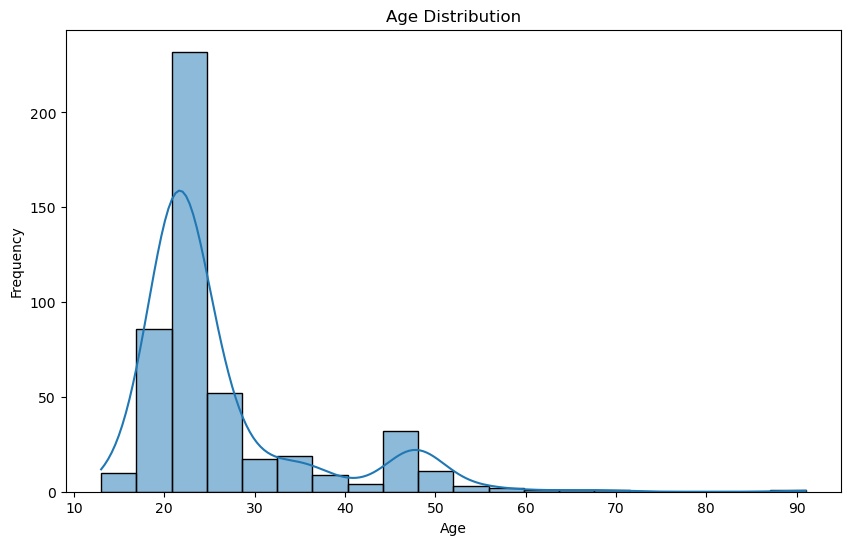

In [10]:
# Age Distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['age'], bins=20, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


### Clean Gender Values and plot pie(Male, Female, & Others)

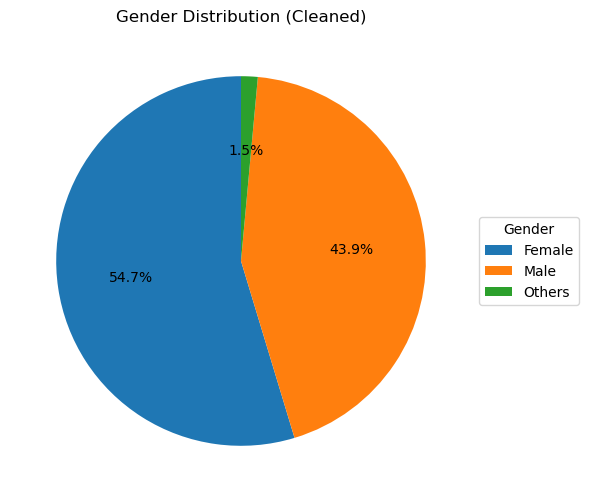

In [11]:
#Gender Distribution
# Keep only Male, Female, and group others
df['gender'] = df['gender'].apply(lambda x: x if x in ['Male', 'Female'] else 'Others')
# Count values
gender_counts = df['gender'].value_counts()
# Plot pie chart
plt.figure(figsize=(8,6))
plt.pie(gender_counts, labels=None, autopct='%1.1f%%', startangle=90)
plt.title('Gender Distribution (Cleaned)')

# Add legend on the right
plt.legend(gender_counts.index, title='Gender', bbox_to_anchor=(1, 0.5), loc='center left')
plt.show()

### Occupation Status

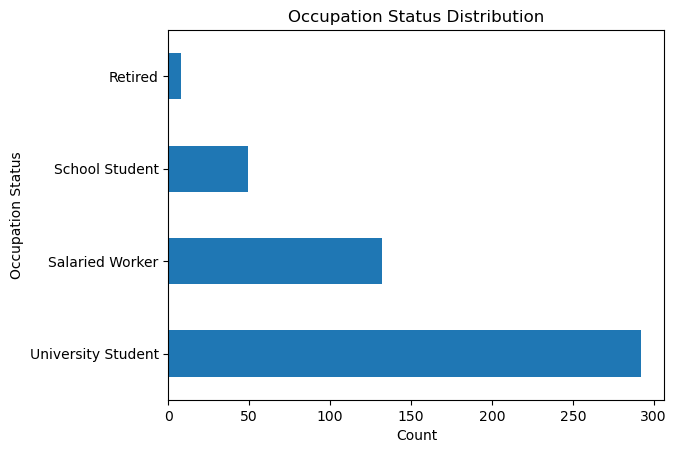

In [12]:
# Occupation Status
occupation_counts = df['occupation_status'].value_counts()
occupation_counts.plot(kind='barh')
plt.title('Occupation Status Distribution')
plt.ylabel('Occupation Status')
plt.xlabel('Count')
plt.show()

### Daily social media time histogram

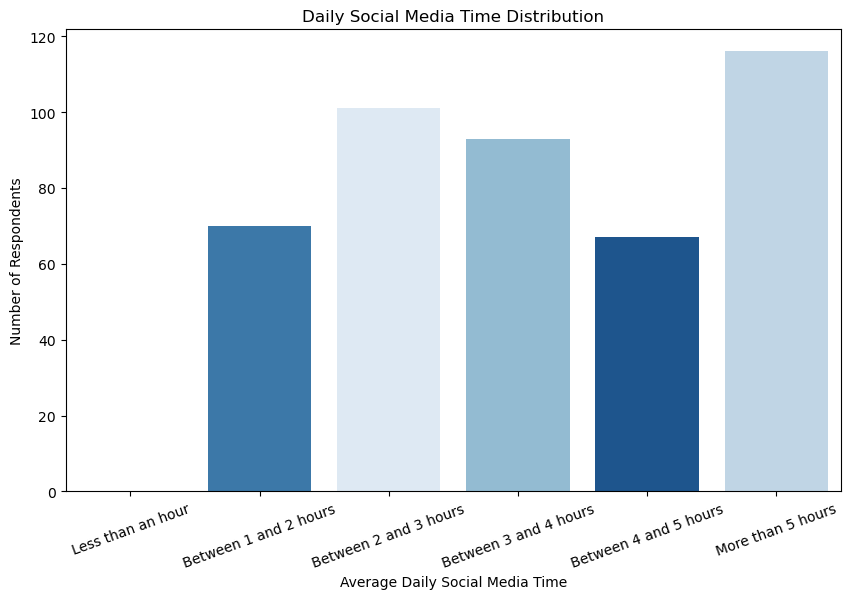

In [13]:
order = [
    'Less than an hour', 
    'Between 1 and 2 hours', 
    'Between 2 and 3 hours', 
    'Between 3 and 4 hours', 
    'Between 4 and 5 hours', 
    'More than 5 hours'
]

plt.figure(figsize=(10, 6))
sns.countplot(x='daily_social_media_time', data=df, order=order, hue='daily_social_media_time', legend=False, palette="Blues")
plt.title('Daily Social Media Time Distribution')
plt.xlabel('Average Daily Social Media Time')
plt.ylabel('Number of Respondents')
plt.xticks(rotation=20)
plt.show()


### Average depression by age

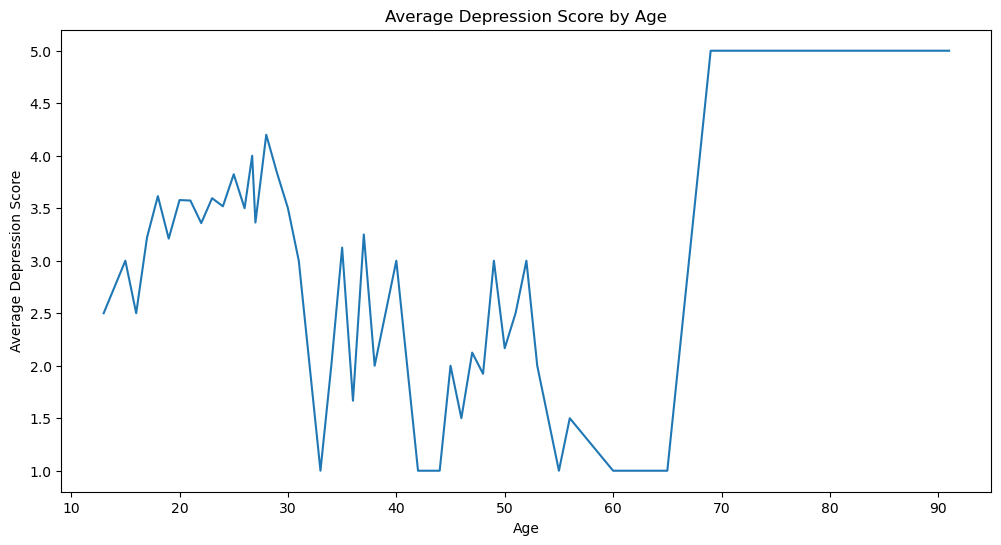

In [14]:
# Relationship between depression and age
age_depression = df.groupby('age')['depression_score'].mean().reset_index()
plt.figure(figsize=(12, 6))
sns.lineplot(data=age_depression, x='age', y='depression_score')
plt.title('Average Depression Score by Age')
plt.xlabel('Age')
plt.ylabel('Average Depression Score')
plt.show()

### Map social_media_usage to numeric (Yes=1, No=0)

In [15]:
# Test the correlation between social media usage and depression score
usage_map = { 'Yes': 1, 'No': 0}  
df['social_media_usage'] = df['social_media_usage'].map(usage_map) 
df.head()

,age,gender,relationship_status,occupation_status,affiliation,social_media_usage,social_media_platforms,daily_social_media_time,purposeless_use,distraction_by_social_media,restless_without_social_media,distraction_score,worry_score,concentration_difficulty,social_comparison,feeling_about_comparisons,seeking_validation,depression_score,activity_interest,sleep_issues
0,21.0,Male,In a relationship,University Student,University,1,"Facebook, Twitter, Instagram, YouTube, Discord...",Between 2 and 3 hours,5,3,2,5,2,5,2,3,2,5,4,5
1,21.0,Female,Single,University Student,University,1,"Facebook, Twitter, Instagram, YouTube, Discord...",More than 5 hours,4,3,2,4,5,4,5,1,1,5,4,5
2,21.0,Female,Single,University Student,University,1,"Facebook, Instagram, YouTube, Pinterest",Between 3 and 4 hours,3,2,1,2,5,4,3,3,1,4,2,5
3,21.0,Female,Single,University Student,University,1,"Facebook, Instagram",More than 5 hours,4,2,1,3,5,3,5,1,2,4,3,2
4,21.0,Female,Single,University Student,University,1,"Facebook, Instagram, YouTube",Between 2 and 3 hours,3,5,4,4,5,5,3,3,3,4,4,1


### Correlation test: social_media_usage vs depression_score + plot

In [16]:
# Correlation test
corr, p_value = pearsonr(df['social_media_usage'], df['depression_score'])
print(f"Correlation: {corr:.3f}, P-value: {p_value:.3f}")

Correlation: 0.116, P-value: 0.011


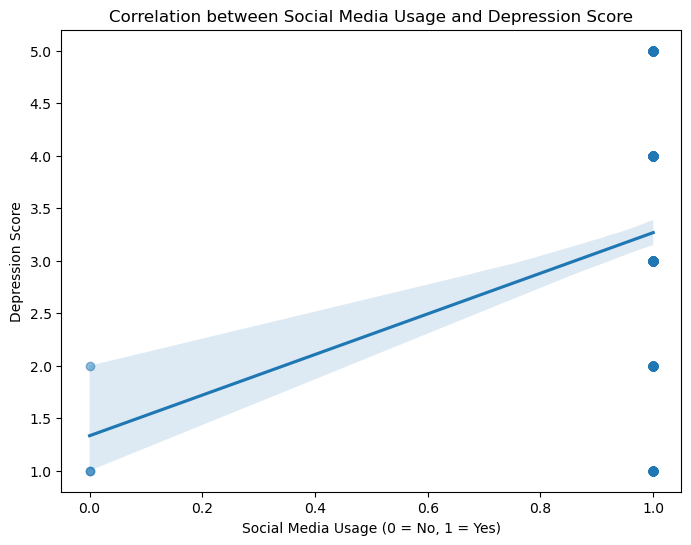

In [17]:
plt.figure(figsize=(8, 6))
sns.regplot(x='social_media_usage', y='depression_score', data=df, logistic=False, scatter_kws={'alpha':0.5})
plt.title("Correlation between Social Media Usage and Depression Score")
plt.xlabel("Social Media Usage (0 = No, 1 = Yes)")
plt.ylabel("Depression Score")
plt.show()


### Correlation test: age vs depression_score + plot

In [18]:
# Correlation test
corr_age, p_value_age = pearsonr(df['age'], df['depression_score'])
print(f"Correlation (Age vs Depression): {corr_age:.3f}, P-value: {p_value_age:.3f}")


Correlation (Age vs Depression): -0.304, P-value: 0.000


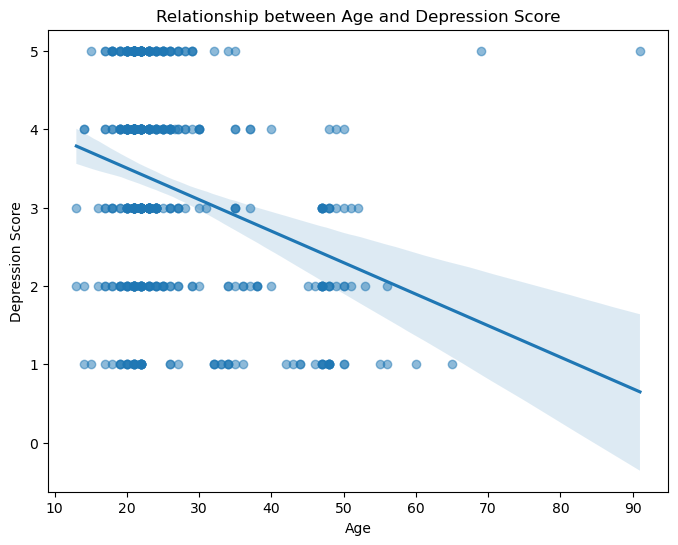

In [19]:
plt.figure(figsize=(8,6))
sns.regplot(x='age', y='depression_score', data=df, scatter_kws={'alpha':0.5})
plt.title("Relationship between Age and Depression Score")
plt.xlabel("Age")
plt.ylabel("Depression Score")
plt.show()


### Clean daily_social_media_time (extract numeric + convert)

In [20]:
# Clean daily_social_media_time column
df['daily_social_media_time'] = (
    df['daily_social_media_time']
    .astype(str)                           # ensure all are strings
    .str.extract(r'(\d+\.?\d*)')           # extract numeric part (e.g. "2.5" from "2.5 hrs")
    .astype(float)                         # convert to float
)

# Check if conversion worked
print(df['daily_social_media_time'].head(10))


0    2.0
1    5.0
2    3.0
3    5.0
4    2.0
5    2.0
6    3.0
7    5.0
8    5.0
9    NaN
Name: daily_social_media_time, dtype: float64


In [21]:
# Convert daily_social_media_time to numeric (hours)
def convert_time(value):
    if pd.isna(value):
        return np.nan
    value = str(value).lower()
    if "less than" in value:
        return 0.5   # assume 0.5 hour
    elif "more than" in value:
        return 6.0   # assume 6 hours for "more than 5"
    else:
        nums = [float(x) for x in value.split() if x.replace('.', '').isdigit()]
        if len(nums) == 2:  # range like "2-3 hours"
            return np.mean(nums)
        elif len(nums) == 1:
            return nums[0]
    return np.nan

df['daily_social_media_time'] = df['daily_social_media_time'].apply(convert_time)

# Drop or fill missing
df['daily_social_media_time'] = df['daily_social_media_time'].fillna(0)


### Correlation: daily_social_media_time vs depression_score + plot

In [22]:
corr_time, p_value_time = pearsonr(df['daily_social_media_time'], df['depression_score'])
print(f"Correlation (Daily Social Media Time vs Depression): {corr_time:.3f}, P-value: {p_value_time:.3f}")

Correlation (Daily Social Media Time vs Depression): 0.330, P-value: 0.000


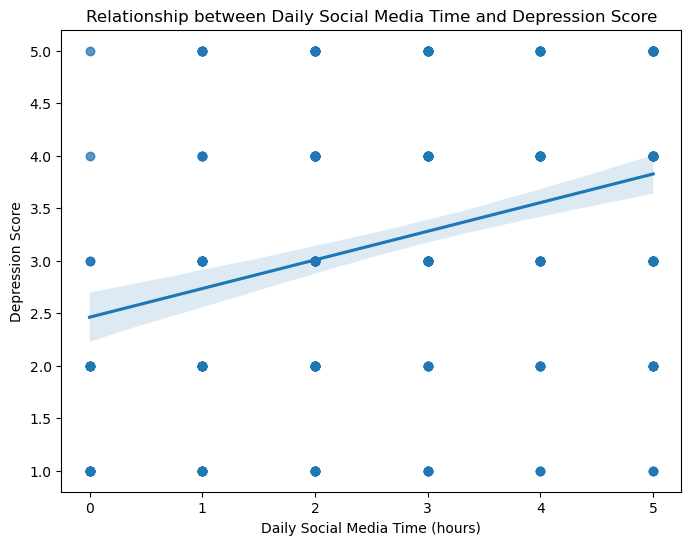

In [23]:
# Visualization
plt.figure(figsize=(8,6))
sns.regplot(x='daily_social_media_time', y='depression_score', data=df, scatter_kws={'alpha':0.5})
plt.title("Relationship between Daily Social Media Time and Depression Score")
plt.xlabel("Daily Social Media Time (hours)")
plt.ylabel("Depression Score")
plt.show()

### Correlation heatmap of psychological factors

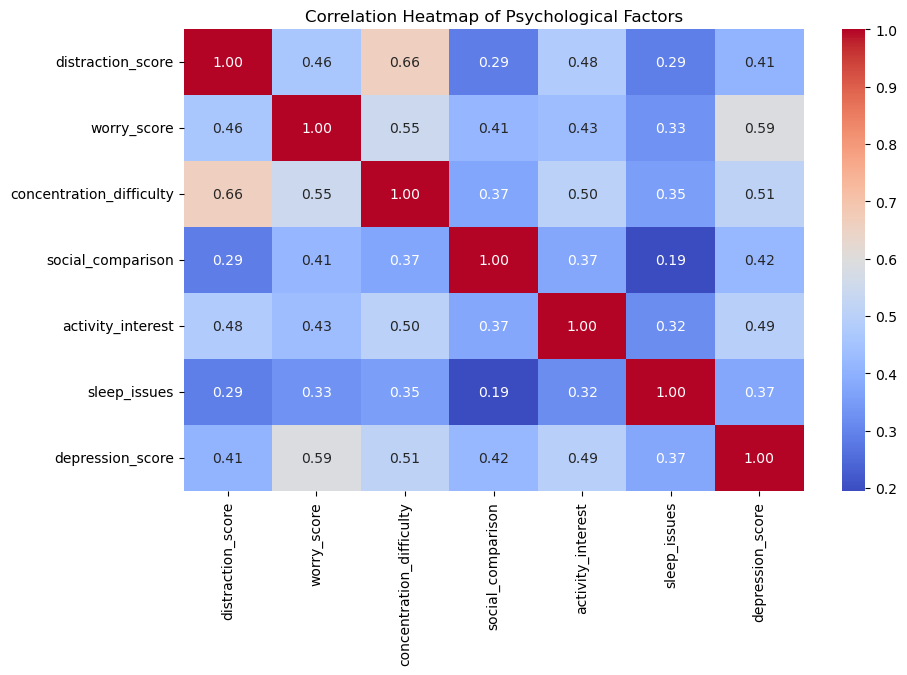

In [24]:
factors = ['distraction_score', 'worry_score', 'concentration_difficulty', 
           'social_comparison', 'activity_interest', 'sleep_issues', 'depression_score']

plt.figure(figsize=(10,6))
sns.heatmap(df[factors].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Psychological Factors")
plt.show()


## Step - 5: Data Modeling 

In [25]:
# Create binary target: High depression (>=3) vs Low depression (<3)
df['depression_label'] = (df['depression_score'] >= 3).astype(int)

In [26]:
# Select numeric features for now
features = ['age', 'daily_social_media_time', 'distraction_score', 
            'worry_score', 'concentration_difficulty', 
            'social_comparison', 'sleep_issues']

x = df[features]
y = df['depression_label']

In [27]:
# Splitting the data into training and test datasets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [28]:
print(x.shape, x_train.shape, x_test.shape)

(481, 7) (384, 7) (97, 7)


In [29]:
model = LogisticRegression(max_iter=1000)
model.fit(x_train, y_train)

LogisticRegression(max_iter=1000)

## Step - 6: Model Evaluation

### Accuracy Score

In [30]:
# Accuracy on training data
x_train_pre = model.predict(x_train)
training_data_accuracy = accuracy_score(x_train_pre, y_train)

In [31]:
print('Accuracy on Training data: ', training_data_accuracy)

Accuracy on Training data:  0.7916666666666666


In [32]:
# Accuracy on test data
x_test_pre = model.predict(x_test)
test_data_accuracy = accuracy_score(x_test_pre, y_test)

In [33]:
print('Accuracy on Test data: ', test_data_accuracy)

Accuracy on Test data:  0.8350515463917526


## Step 6: Presentation and Automation 

### Confusion Matrix

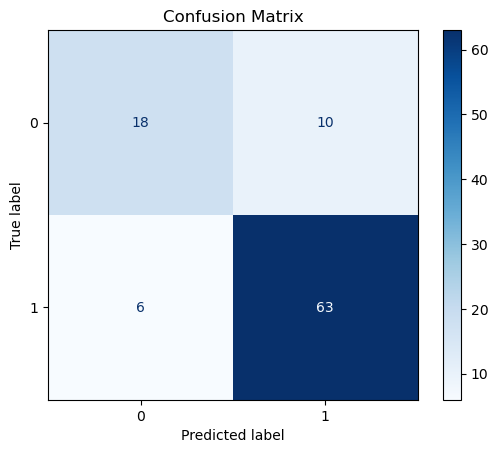

In [34]:
cm = confusion_matrix(y_test, x_test_pre)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

In [35]:
# Predictions
y_pred = model.predict(x_test)

print("Classification Report:\n", classification_report(y_test, y_pred))
print("-------------------------------------------------------------------------------------------------------")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("-------------------------------------------------------------------------------------------------------")
print("ROC AUC Score:", roc_auc_score(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.64      0.69        28
           1       0.86      0.91      0.89        69

    accuracy                           0.84        97
   macro avg       0.81      0.78      0.79        97
weighted avg       0.83      0.84      0.83        97

-------------------------------------------------------------------------------------------------------
Confusion Matrix:
 [[18 10]
 [ 6 63]]
-------------------------------------------------------------------------------------------------------
ROC AUC Score: 0.7779503105590062


## Building a predictive system

In [36]:
input_age = 22
input_daily_social_media_time = 3
input_distraction_score = 4
input_worry_score = 3 
input_concentration_difficulty = 2
input_social_comparison = 3
input_sleep_issues = 4
input_data = (input_age, input_daily_social_media_time, input_distraction_score, input_worry_score,
              input_concentration_difficulty, input_social_comparison, input_sleep_issues)

# Change the iput data to a numpy array
input_arr = np.asarray(input_data)

# Reshape the numpy array as we are predicting only one instance
input_reshape = input_arr.reshape(1, -1)

prediction = model.predict(input_reshape)

if prediction[0] == 1:
    print("Prediction Result: Person is likely to have HIGH depression (score ≥ 3).")
    print("This indicates that the individual may be experiencing elevated mental stress or emotional strain.")
    print("Recommendation: It is advised to reduce excessive social media usage, maintain a balanced routine, and seek support or counseling if needed.")
else:
    print("Prediction Result: Person is likely to have LOW depression (score < 3).")
    print("The individual appears to have a stable mental state based on the given inputs.")
    print("Recommendation: Continue healthy online habits and maintain a positive balance between social media and real-life activities.")

Prediction Result: Person is likely to have HIGH depression (score ≥ 3).
This indicates that the individual may be experiencing elevated mental stress or emotional strain.
Recommendation: It is advised to reduce excessive social media usage, maintain a balanced routine, and seek support or counseling if needed.


C:\Users\sanjay kumar\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


## 📊 Results Analysis

### Accuracy = 84% → The model predicts fairly well overall.

### Class 0 (Low Depression):

### Precision = 0.75 → When model predicts "low depression", it’s correct 75% of the time.

### Recall = 0.64 → It only captures 64% of actual low depression cases (misses some).

### Class 1 (High Depression):

### Precision = 0.86 → Strong, so fewer false positives.

### Recall = 0.91 → Excellent, it detects almost all high depression cases.

### F1 = 0.89 → Balanced performance.

### ROC AUC = 0.78 → Good (0.7–0.8 = fair, 0.8–0.9 = strong). Your model is in the good range.